In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import seaborn as sns;sns.set()
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from datetime import datetime,time
import os

---

* *A. housing data :*

In [2]:
df=pd.read_csv(r"Data_Set\housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [127]:
df.shape

(20640, 10)

In [128]:
X=df[["median_house_value"]]
X=np.array(X)
X

array([[452600.],
       [358500.],
       [352100.],
       ...,
       [ 92300.],
       [ 84700.],
       [ 89400.]])

---
*Outlier detection with Local Outlier Factor (LOF)*

In [129]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X)
df["median_house_value_LocalOutlierFactor"]=y_pred
df["median_house_value_LocalOutlierFactor"].value_counts()

median_house_value_LocalOutlierFactor
 1    18579
-1     2061
Name: count, dtype: int64

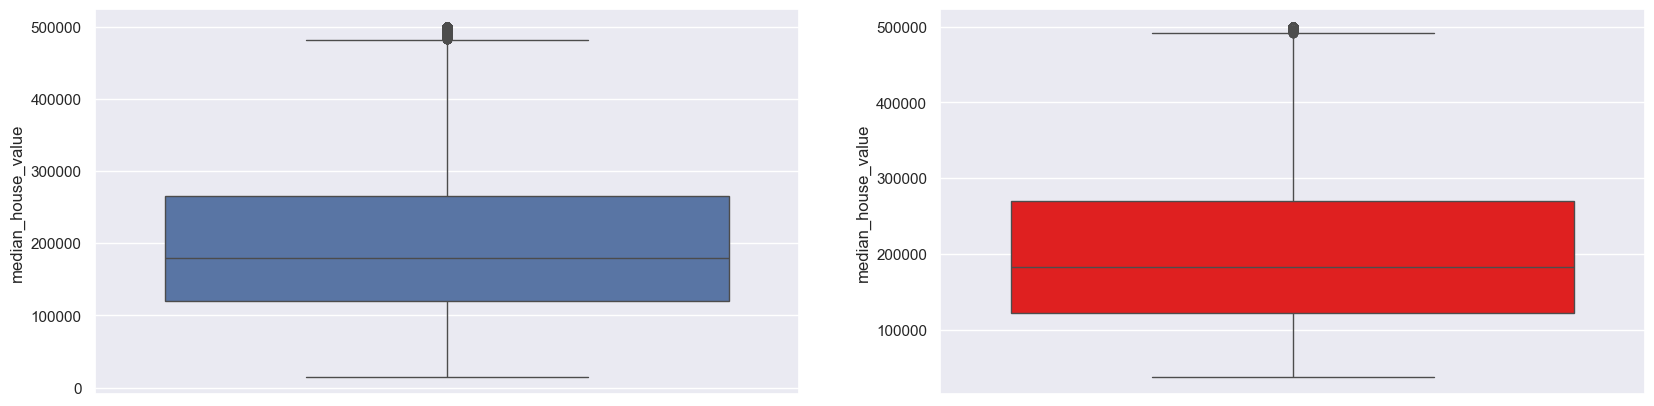

In [131]:
matplotlib.rcParams["figure.figsize"]=(20,5)
plt.subplot(121)
sns.boxplot(data=df,y="median_house_value")
plt.subplot(122)
sns.boxplot(data=df[df["median_house_value_LocalOutlierFactor"]==1],y="median_house_value",color="red");

---
*Outlier detection with IsolationForest*

In [134]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(random_state=0).fit(X)
pred=clf.predict(X)
df["median_house_value_IsolationForest"]=pred
df["median_house_value_IsolationForest"].value_counts()

median_house_value_IsolationForest
 1    13572
-1     7068
Name: count, dtype: int64

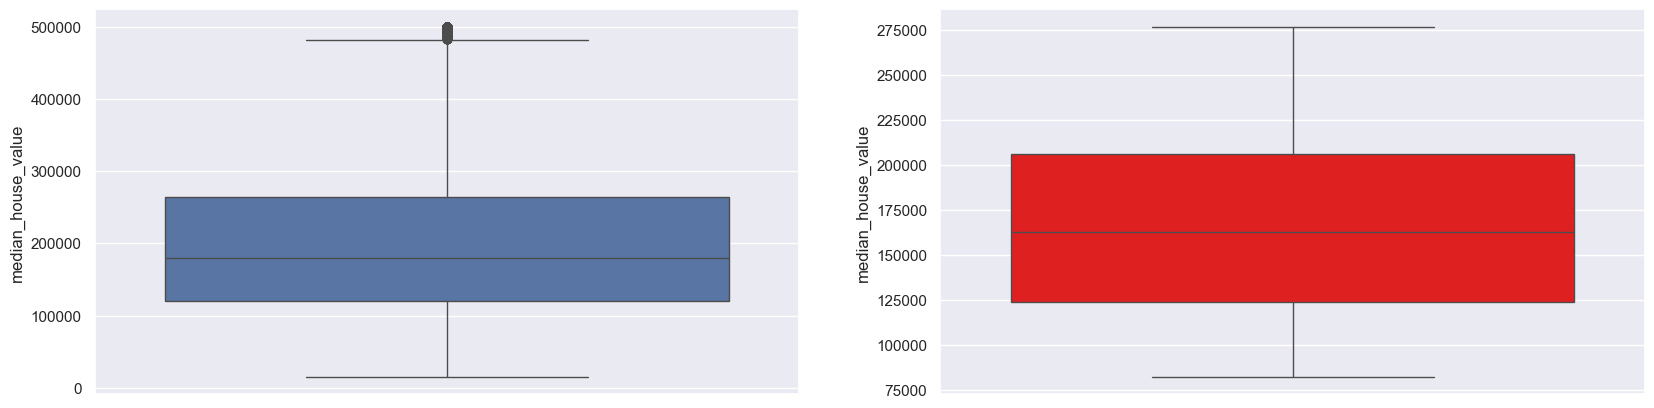

In [135]:
matplotlib.rcParams["figure.figsize"]=(20,5)
plt.subplot(121)
sns.boxplot(data=df,y="median_house_value")
plt.subplot(122)
sns.boxplot(data=df[df["median_house_value_IsolationForest"]==1],y="median_house_value",color="red");

---
*Outlier detection with OneClassSVM*

In [136]:
from sklearn.svm import OneClassSVM
clf = OneClassSVM(gamma='auto').fit(X)

df["median_house_value_OneClassSVM_outliers"]=clf.predict(X)
df["median_house_value_OneClassSVM_outliers"].value_counts()

median_house_value_OneClassSVM_outliers
 1    10931
-1     9709
Name: count, dtype: int64

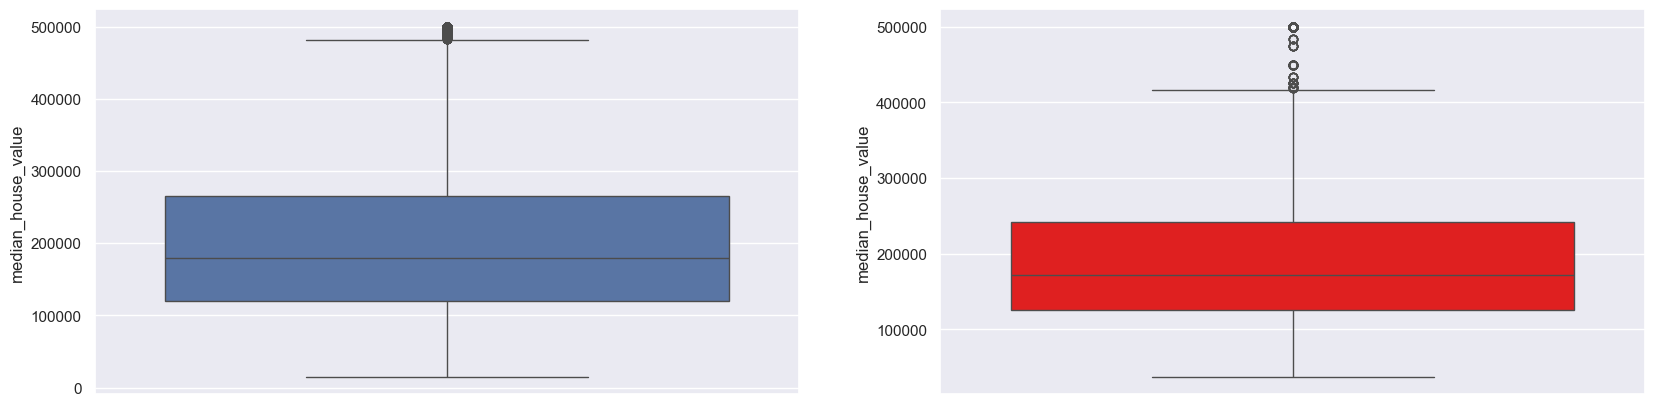

In [137]:
matplotlib.rcParams["figure.figsize"]=(20,5)
plt.subplot(121)
sns.boxplot(data=df,y="median_house_value")
plt.subplot(122)
sns.boxplot(data=df[df["median_house_value_OneClassSVM_outliers"]==1],y="median_house_value",color="red");

---
*Outlier detection with DBSCAN*

In [138]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
pred=dbscan.fit_predict(X)
dbscan.labels_
df["median_house_value_DBSCAN"]=pred
df["median_house_value_DBSCAN"].value_counts()

median_house_value_DBSCAN
-1       4912
 70       965
 41       122
 68       117
 43       103
         ... 
 1250       5
 656        5
 1246       5
 81         5
 1669       5
Name: count, Length: 1671, dtype: int64

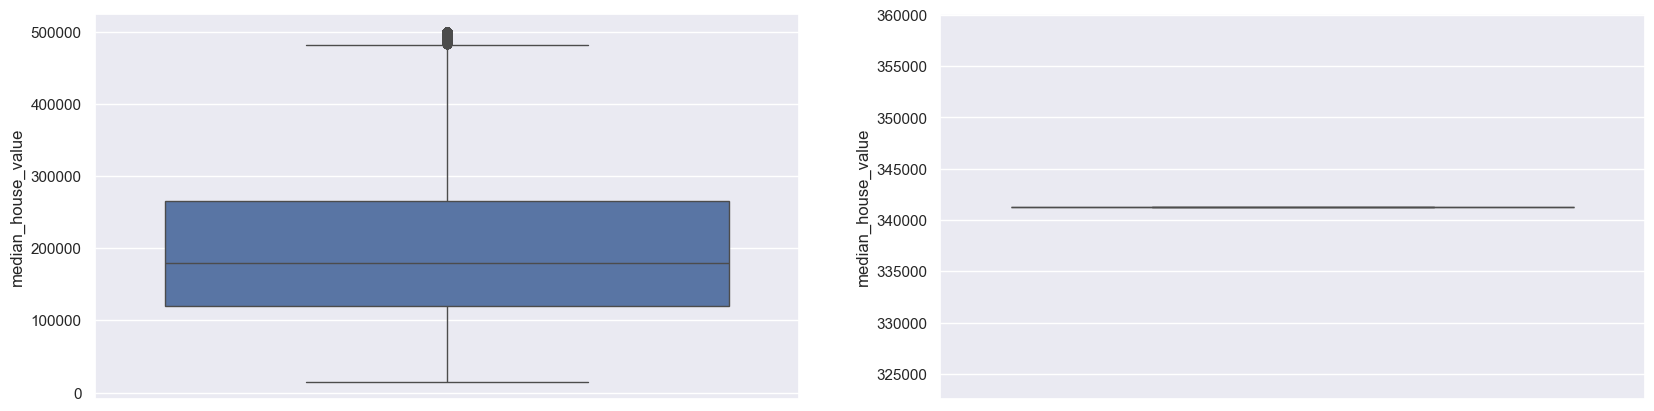

In [139]:
matplotlib.rcParams["figure.figsize"]=(20,5)
plt.subplot(121)
sns.boxplot(data=df,y="median_house_value")
plt.subplot(122)
sns.boxplot(data=df[df["median_house_value_DBSCAN"]==1],y="median_house_value",color="red");

---
---
---

* *A. Insurance data :*

In [3]:
df=pd.read_csv(r"Data_Set\data_car.csv")
df=df.drop(["X_OBSTAT_","clm","numclaims"],axis=1)
df=df[df["veh_value"] != 0]
df["veh_value"]=df["veh_value"]*10000
df=df[df["claimcst0"] != 0]
df.head()

,veh_value,exposure,claimcst0,veh_body,veh_age,gender,area,agecat
14,16600.0,0.484600,669.509999,SEDAN,3,M,B,6
16,15100.0,0.993840,806.609999,SEDAN,3,F,F,4
17,7600.0,0.539357,401.805451,HBACK,3,M,C,4
40,18900.0,0.654346,1811.709997,STNWG,3,M,F,2
64,40600.0,0.851472,5434.439987,STNWG,2,M,F,3


In [153]:
df.shape

(4618, 8)

In [142]:
X=df[["veh_value","claimcst0"]]
X=np.array(X)
X

array([[16600.       ,   669.5099993],
       [15100.       ,   806.6099987],
       [ 7600.       ,   401.8054514],
       ...,
       [ 7300.       ,  8125.459992 ],
       [19800.       ,  2473.969994 ],
       [ 9700.       ,  7646.769989 ]])

---
*Outlier detection with Local Outlier Factor (LOF)*

In [143]:

from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X)
df["veh_value_claimcst0_LocalOutlierFactor"]=y_pred
df["veh_value_claimcst0_LocalOutlierFactor"].value_counts()

veh_value_claimcst0_LocalOutlierFactor
 1    4156
-1     462
Name: count, dtype: int64

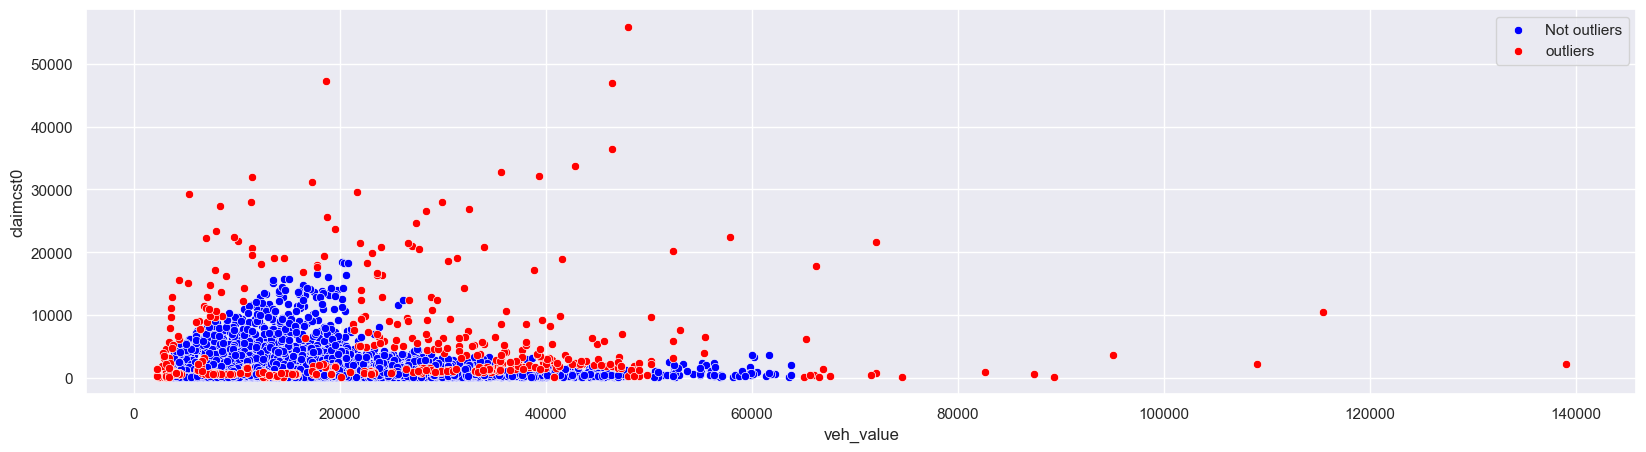

In [144]:
matplotlib.rcParams["figure.figsize"]=(20,5)
sns.scatterplot(x=df[df["veh_value_claimcst0_LocalOutlierFactor"]==1]["veh_value"],
                y=df[df["veh_value_claimcst0_LocalOutlierFactor"]==1]["claimcst0"],c="blue",label="Not outliers");

sns.scatterplot(x=df[df["veh_value_claimcst0_LocalOutlierFactor"]==-1]["veh_value"],
                y=df[df["veh_value_claimcst0_LocalOutlierFactor"]==-1]["claimcst0"],c="red",label="outliers");

---
*Outlier detection with IsolationForest*

In [145]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(random_state=0).fit(X)
pred=clf.predict(X)
df["veh_value_claimcst0_IsolationForest"]=pred
df["veh_value_claimcst0_IsolationForest"].value_counts()

veh_value_claimcst0_IsolationForest
 1    3870
-1     748
Name: count, dtype: int64

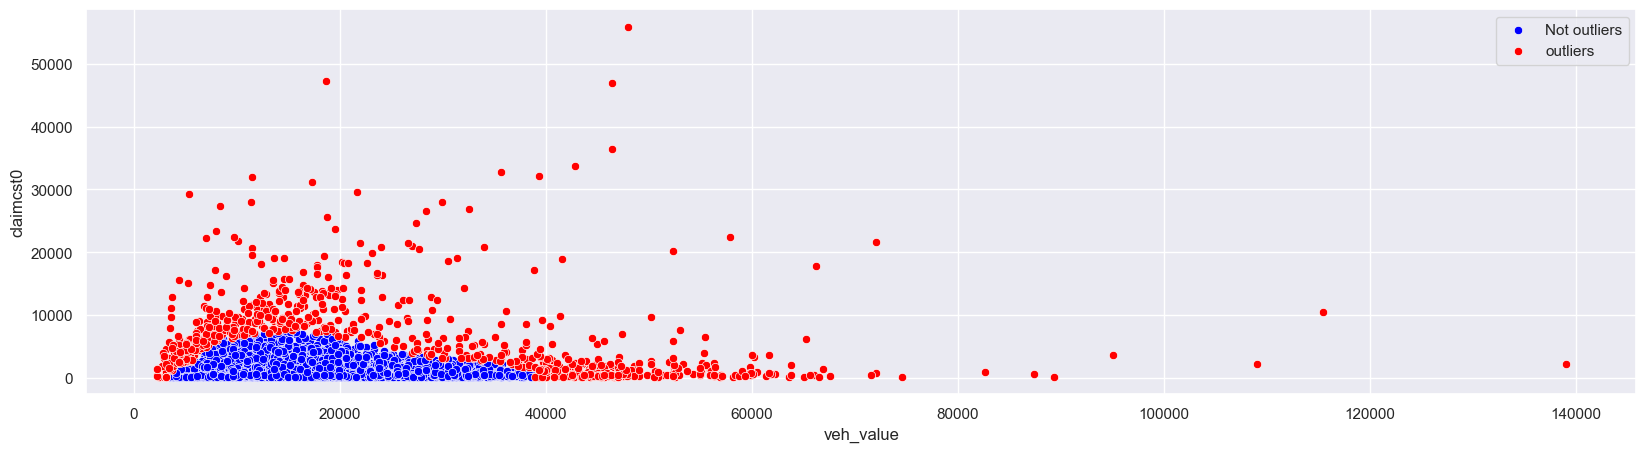

In [146]:
matplotlib.rcParams["figure.figsize"]=(20,5)
sns.scatterplot(x=df[df["veh_value_claimcst0_IsolationForest"]==1]["veh_value"],
                y=df[df["veh_value_claimcst0_IsolationForest"]==1]["claimcst0"],c="blue",label="Not outliers");

sns.scatterplot(x=df[df["veh_value_claimcst0_IsolationForest"]==-1]["veh_value"],
                y=df[df["veh_value_claimcst0_IsolationForest"]==-1]["claimcst0"],c="red",label="outliers");

---
*Outlier detection with OneClassSVM*

In [147]:
from sklearn.svm import OneClassSVM
clf = OneClassSVM(gamma='auto').fit(X)

df["veh_value_claims_OneClassSVM_outliers"]=clf.predict(X)
df["veh_value_claims_OneClassSVM_outliers"].value_counts()

veh_value_claims_OneClassSVM_outliers
 1    2918
-1    1700
Name: count, dtype: int64

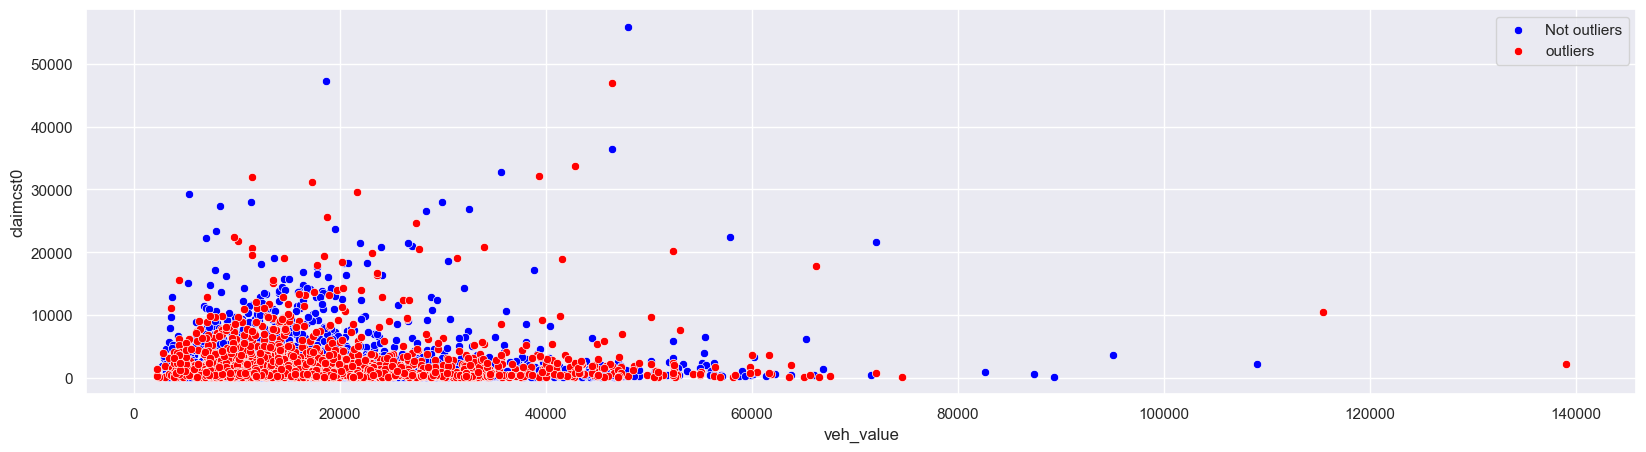

In [148]:
matplotlib.rcParams["figure.figsize"]=(20,5)
sns.scatterplot(x=df[df["veh_value_claims_OneClassSVM_outliers"]==1]["veh_value"],
                y=df[df["veh_value_claims_OneClassSVM_outliers"]==1]["claimcst0"],c="blue",label="Not outliers");

sns.scatterplot(x=df[df["veh_value_claims_OneClassSVM_outliers"]==-1]["veh_value"],
                y=df[df["veh_value_claims_OneClassSVM_outliers"]==-1]["claimcst0"],c="red",label="outliers");

---
*Outlier detection with DBSCAN*

In [149]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
pred=dbscan.fit_predict(X)
dbscan.labels_
df["veh_value_claimcst0_DBSCAN"]=pred
df["veh_value_claimcst0_DBSCAN"].value_counts()

veh_value_claimcst0_DBSCAN
-1     4384
 2       12
 16       9
 4        9
 14       9
 6        8
 13       8
 11       7
 26       7
 18       7
 8        7
 3        7
 27       6
 1        6
 7        6
 5        6
 15       6
 24       6
 19       6
 33       6
 10       6
 31       5
 30       5
 9        5
 32       5
 29       5
 35       5
 36       5
 34       5
 23       5
 28       5
 25       5
 22       5
 21       5
 20       5
 0        5
 17       5
 12       5
 37       5
Name: count, dtype: int64

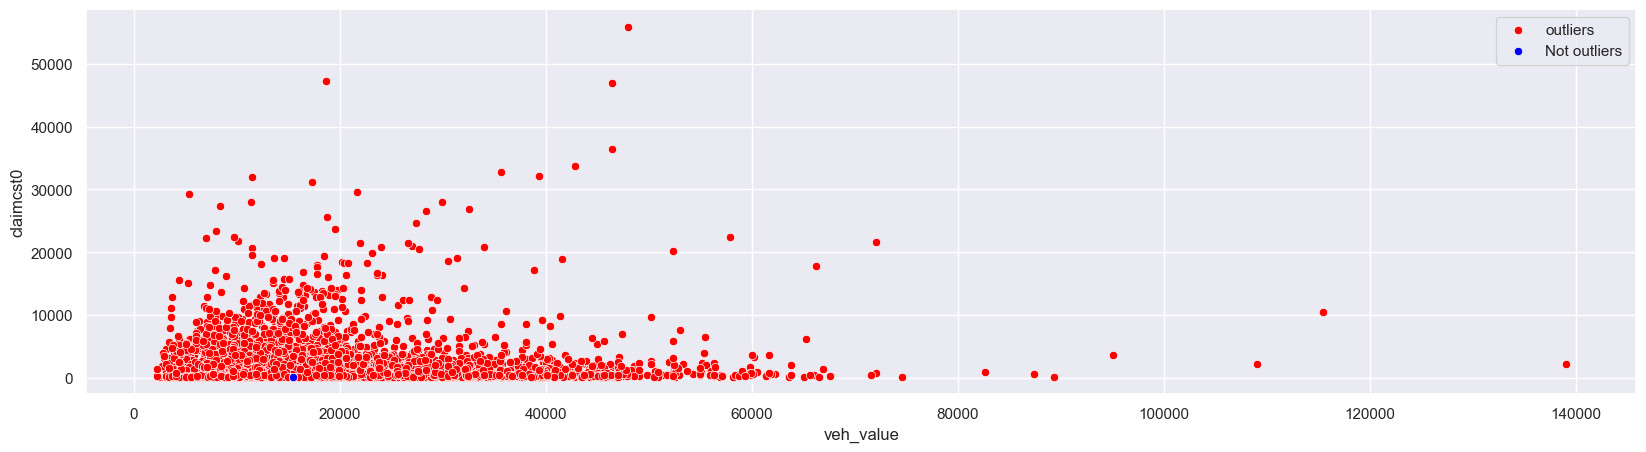

In [150]:
matplotlib.rcParams["figure.figsize"]=(20,5)
sns.scatterplot(x=df[df["veh_value_claimcst0_DBSCAN"]==-1]["veh_value"],
                y=df[df["veh_value_claimcst0_DBSCAN"]==-1]["claimcst0"],c="red",label="outliers");

sns.scatterplot(x=df[df["veh_value_claimcst0_DBSCAN"]==1]["veh_value"],
                y=df[df["veh_value_claimcst0_DBSCAN"]==1]["claimcst0"],c="blue",label="Not outliers");

---